In [4]:
import pandas as pd
from ipynb.fs.full.utils import get_df, rename_values
from ipynb.fs.full.plots import single_barplot

In [5]:
# get formatted and ready to use dataframe
df = get_df()

In [6]:
df.head(10)

,ID,Status,Duration,D1_Undergraduation,D1_Specialization,D1_Master,D1_Phd,D1_Courses,D1_Others,D2_Country,...,Q4_ML_Life_Cycle_Main_Problems_Model_Monitoring_Free_Third,Q4_ML_Life_Cycle_Main_Problems_Model_Other_Free_First,Q4_ML_Life_Cycle_Main_Problems_Model_Other_Free_Second,Q4_ML_Life_Cycle_Main_Problems_Model_Other_Free_Third,Q5_ML_Life_Cycle_Main_Problems_Ranking_Free_First,Q5_ML_Life_Cycle_Main_Problems_Ranking_Free_Second,Q5_ML_Life_Cycle_Main_Problems_Ranking_Free_Third,Q6_ML_Solution_Optimality,Q7_ML_Solution_Optimality_Extra_Effort,Origin
2,31,Completed (31),1317,Economics,-99,M.Sc. in Economics,-99,Data Scientist in Datacamp,-99,Brazil,...,Feeding the model in appropriate way,-99,-99,-99,Problems with data collection and cleaning,Others tasks which competes the time,Search the appropriate methodology,Frequently,70,https://ww2.unipark.de/uc/seml/
3,34,Completed (31),854,-99,Management,No,No,No,No,Brazil,...,-99,-99,-99,-99,-99,-99,-99,Never,-77,-99
4,36,Completed (31),1593,Mathmathics,Informatics,MSC Computer Science,PhD computer Science,Vários cursos in Coursera,-99,Brazil,...,-99,-99,-99,-99,Data preparation,Prediction Task identification,Selecionar of learning algo,Sometimes,30,-99
5,57,Completed (31),4238,Computer Science,Data science specialization,-99,-99,-99,-99,Germany,...,-99,-99,-99,-99,-99,-99,-99,Sometimes,50,-99
6,46,Completed (31),2821,Graduation in Actuary,Post Graduation in Data Science,M Sc in Data Science -ML models,no Ph D,no other certifications,-99,Brazil,...,-99,-99,-99,-99,understand the pain and identify if ML is real...,we need to cut or we need to cluster some kind...,present and discuss metrics and distribution o...,Sometimes,20,-99
7,53,Completed (31),2097,Information System,-99,M.Sc. in Applied Informatics,-99,-99,-99,Brazil,...,-99,-99,-99,-99,insufficient amount of data,apply the models,Not knowing how to deploy,Sometimes,50,-99
8,58,Completed (31),1696,Computer Science,-99,Computer Science,-99,Microsoft Professional Program Data Science & ...,-99,Germany,...,-99,-99,-99,-99,Data Availability,Sufficient Data Quantity,Deployment Costs for non-trivial ML projects,Sometimes,30,https://t.co/
9,64,Completed (31),1250,Electrical engineering,-99,M.Sc. in AI and Software Engineering,Computer science,"Azure Associate AI Engineer, Azure Data Scienc...",-99,Sweden,...,-99,-99,-99,-99,"Basic: no proper engagement from management, n...",Understand the context,-99,Sometimes,50,https://www.linkedin.com/
10,65,Completed (31),106,-99,-99,-99,-99,-99,-99,0,...,-99,-99,-99,-99,-99,-99,-99,Never,-77,-99
11,69,Completed (31),79,-99,-99,-99,-99,-99,-99,0,...,-99,-99,-99,-99,-99,-99,-99,Never,-77,https://ww2.unipark.de/uc/seml/


In [7]:
# mapping of old labels to new one
d3_rename_mapping = {
    '1-10 employees': '1-10',
    '11-50 employees': '11-50',
    '51-250 employees': '51-250',
    '251-500 employees': '251-500',
    '501-1,000 employees': '501-1000',
    '1,001-2,000 employees': '1001-2000',
    'More than 2,000 employees': '+2000'
}

In [8]:
df['D3_Company_Size'].value_counts().index

Index(['More than 2,000 employees', '51-250 employees', '11-50 employees',
       '1,001-2,000 employees', '0', '1-10 employees', '251-500 employees',
       '501-1,000 employees'],
      dtype='object')

In [5]:
# index of our barplot
indexes = list(df['D3_Company_Size'].value_counts().index)
# total answers of each index
values = list(df['D3_Company_Size'].value_counts())
# dataframe specific for question D3
d3_df= pd.DataFrame(data={'Company Size': rename_values(d3_rename_mapping, indexes), 'Answers': values})

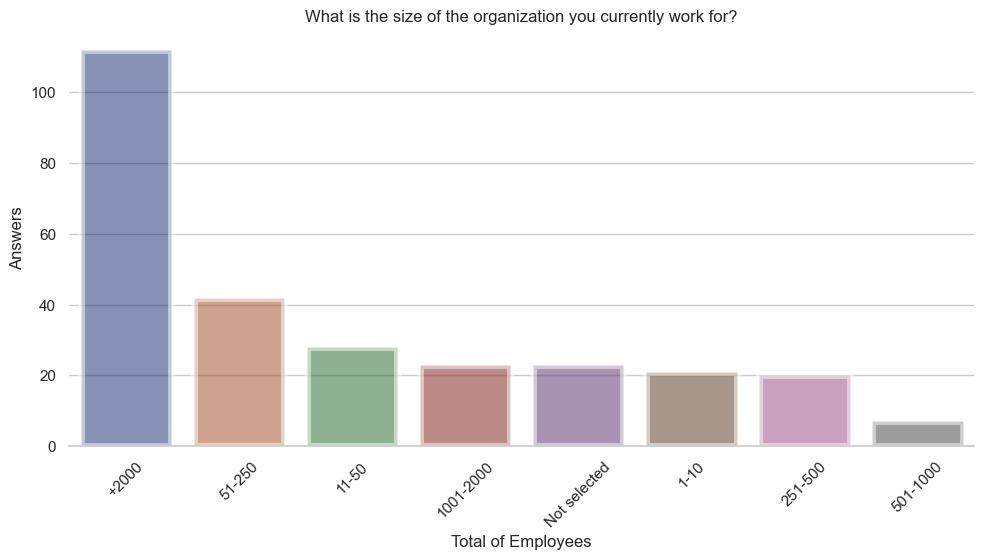

In [7]:
single_barplot(d3_df, "Company Size", "Answers", title="What is the size of the organization you currently work for?",
               x_label="Total of Employees", y_label="Answers", x_label_rotation=45)